<a href="https://colab.research.google.com/github/sarahethompson/eportfolio/blob/main/artefacts/module-3/unit-03-multiple-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary of Analysis

This notebook explores the relationship between car weight, engine volume, and CO2 emissions using linear regression.

1.  **Data Loading and Initial Regression**: I loaded the `cars.csv` dataset and performed a linear regression to predict CO2 emissions based on 'Weight' and 'Volume'.
2.  **Coefficient Analysis**: I examined the coefficients of the regression model, which indicate how much CO2 emission changes with a one-unit increase in weight or volume.
    *   Weight coefficient: 0.00755095
    *   Volume coefficient: 0.00780526
3.  **Prediction with Original and Modified Inputs**: I made predictions for CO2 emissions using the trained model with different input values for weight and volume to see the impact on the predicted CO2.
4.  **Impact of Data Modification on Coefficients**: I created a modified dataset by removing some data points and retrained the linear regression model to observe how the coefficients changed. This demonstrated the sensitivity of the model to the training data.
5.  **Data Visualization**: I generated scatter plots to visualize the relationships between:
    *   CO2 Emission vs. Car Weight
    *   CO2 Emission vs. Engine Volume
    *   Car Weight vs. Engine Volume

These visualizations help to understand the trends and correlations within the data, complementing the insights gained from the linear regression analysis.

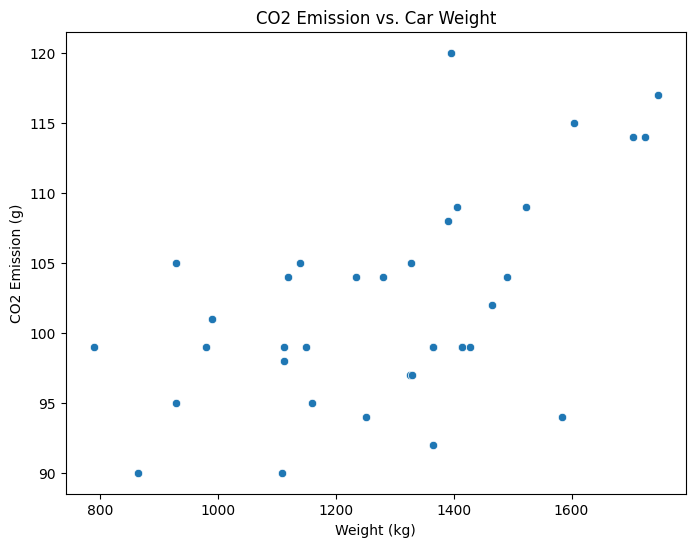

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of CO2 vs. Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='CO2', data=df)
plt.title('CO2 Emission vs. Car Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('CO2 Emission (g)')
plt.show()

In [3]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Coefficient

The coefficient is a factor that describes the relationship with an unknown variable.
In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [4]:
print(regr.coef_)

[0.00755095 0.00780526]


The result array represents the coefficient values of weight and volume.

Weight: 0.00755095
Volume: 0.00780526

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

I think that is a fair guess, but let test it!

We have already predicted that if a car with a 1300cm3 engine weighs 2300kg, the CO2 emission will be approximately 107g.

What if we increase the weight with 1000kg (from 2300 to 3300) what will be the CO2 emission?

Ans: 107.2087328 + (1000 * 0.00755095) = 114.75968

In [5]:
predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Let's add some code to dynamically change the input data for prediction and observe the impact.

In [8]:
# You can change these values to see how they impact the prediction
input_weight = 2500
input_volume = 1500

# Predict the CO2 emission with the new values
predictedCO2_changed = regr.predict([[input_weight, input_volume]])

print(f"Predicted CO2 emission for Weight = {input_weight}kg and Volume = {input_volume}cm3: {predictedCO2_changed}")

Predicted CO2 emission for Weight = 2500kg and Volume = 1500cm3: [110.27997376]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can also recalculate the coefficients with a modified dataset to see how removing data points affects the regression model.

In [9]:
# Create a modified DataFrame by dropping a few rows (e.g., index 0 and 1)
df_modified = df.drop([0, 1])

X_modified = df_modified[['Weight', 'Volume']]
y_modified = df_modified['CO2']

# Create a new linear regression model and fit it to the modified data
regr_modified = linear_model.LinearRegression()
regr_modified.fit(X_modified, y_modified)

# Print the new coefficients
print(f"Original coefficients: {regr.coef_}")
print(f"Coefficients with modified data: {regr_modified.coef_}")

Original coefficients: [0.00755095 0.00780526]
Coefficients with modified data: [0.0092684  0.00752827]


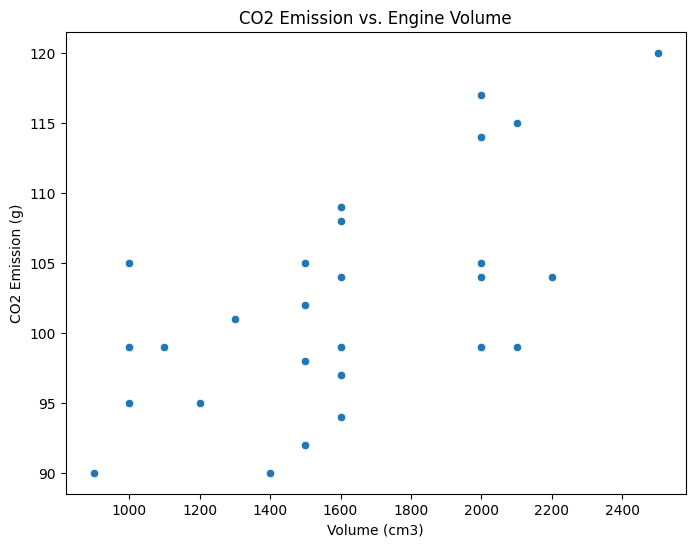

In [12]:
# Create scatter plot of CO2 vs. Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='CO2', data=df)
plt.title('CO2 Emission vs. Engine Volume')
plt.xlabel('Volume (cm3)')
plt.ylabel('CO2 Emission (g)')
plt.show()

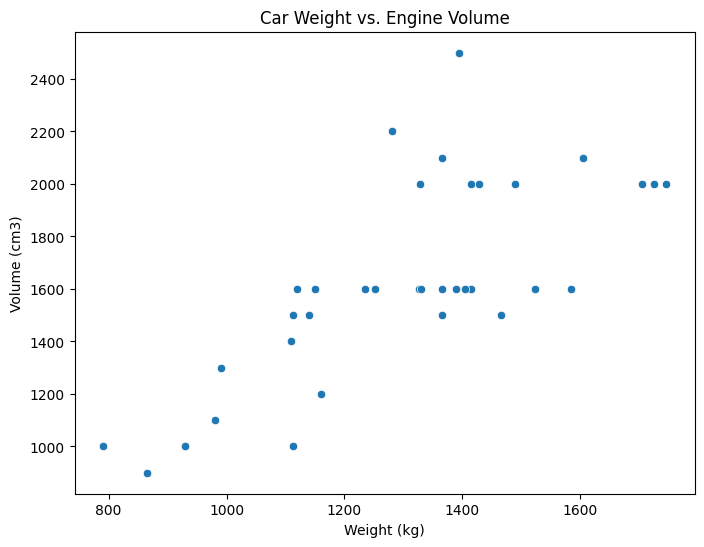

In [13]:
# Create scatter plot of Weight vs. Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Volume', data=df)
plt.title('Car Weight vs. Engine Volume')
plt.xlabel('Weight (kg)')
plt.ylabel('Volume (cm3)')
plt.show()